In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_path  = "M2_2.18mM_pressure_o2_release.csv"
time_col  = "Time (s)"                     # your column is actually hours
press_col = "DWT denoised pressure (kPa)"  # pressure in kPa
gas_col   = "O2 Released (µmol)"          # headspace O2 from csv

In [2]:
df = pd.read_csv(csv_path)
df.columns = [c.strip() for c in df.columns]

# Plotting naq and pressure directly in multiple units (kpa and atm)

certain parts of the code must be uncomennted to plot the different graphs


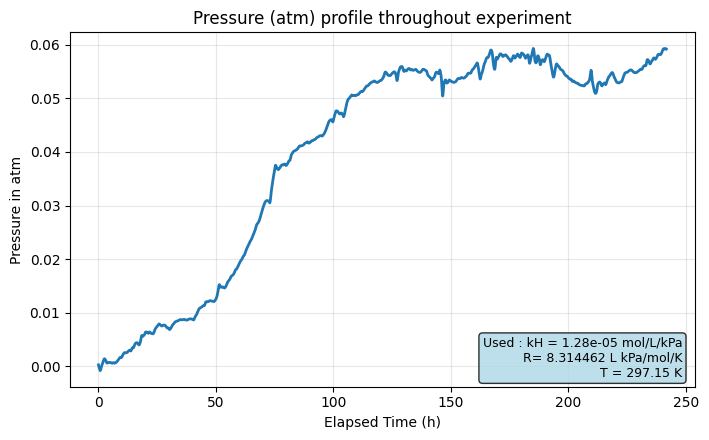

In [7]:
time_h     = pd.to_numeric(df[time_col])
p_kpa      = pd.to_numeric(df[press_col])
n_gas_umol = pd.to_numeric(df[gas_col])


n_theory  = 13.08                         # µmol (theoretical)
kH = 1.283e-5           # mol/L/kPa
Vsol = 0.006           # L
Vg = 0.002
R = 8.314462           # L kPa/mol/K
T = 297.15             # K


def n_aq_umol_from_kpa(p_kpa: pd.Series) -> pd.Series:
    
    n_aq_umol = p_kpa * Vsol * kH * 1e6
    return n_aq_umol

def plotting_pressure(p_kpa: pd.Series) -> pd.Series:

    pressure_plot = p_kpa
    return pressure_plot

def plotting_pressure_in_atm(p_kpa: pd.Series) -> pd.Series:
    pressure_atm = p_kpa / 101.325
    return pressure_atm


#n_aq_umol = n_aq_umol_from_kpa(p_kpa)
# pressure_plot = plotting_pressure(p_kpa)
pressure_atm_plot = plotting_pressure_in_atm(p_kpa)
df_out = pd.DataFrame({
    "Elapsed Time (h)": time_h,
    # "n_aq (µmol)": n_aq_umol,
    "p_kpa (kPa)": p_kpa,
    "p_atm (atm)": pressure_atm_plot
})

plt.figure(figsize=(7.2, 4.5))



plt.plot(df_out["Elapsed Time (h)"], df_out["p_atm (atm)"], linewidth=2)
plt.ylabel("Pressure in atm")
plt.xlabel("Elapsed Time (h)")
plt.title("Pressure (atm) profile throughout experiment")





# plt.plot(df_out["Elapsed Time (h)"], df_out["p_kpa (kPa)"], linewidth=2)
# plt.ylabel("Pressure in kPa")
# plt.xlabel("Elapsed Time (h)")
# plt.title("Pressure (kPa) profile throughout experiment")



# plt.plot(df_out["Elapsed Time (h)"], df_out["n_aq (µmol)"], linewidth=2)
# plt.ylabel("Dissolved oxygen n_aq in µmol")
# plt.xlabel("Elapsed Time (h)")
# plt.title("Dissolved Oxygen (n_aq) calculated from Pressure (kPa)")






# Add detailed info box
info_text = f"""Used : kH = {kH:.2e} mol/L/kPa
R= {R} L kPa/mol/K
T = {T} K"""

plt.text(0.98, 0.02, info_text, 
         transform=plt.gca().transAxes,
         verticalalignment='bottom',
         horizontalalignment='right',
         fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))



plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Using the equation directly to plot graph (in atm)
""" Units used:
K, atm, mol, L, 
KH = 1.3 x 10^-3 mol / L / atm, 
R = 0.082057 L atm / K / mol, 
T = 297.15 K





Using : Vg / (R * T) + kH * Vsol


"""

5.325502586079406


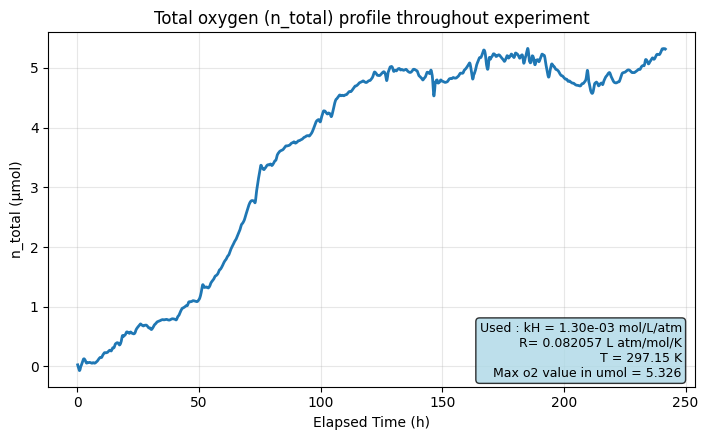

In [4]:
time_h     = pd.to_numeric(df[time_col])
p_kpa      = pd.to_numeric(df[press_col])
p_atm      = p_kpa / 101.325
n_gas_umol = pd.to_numeric(df[gas_col])

#constants
Vg = 0.002           # L
Vsol = 0.006         # L
T = 297.15  
KH = 1.3e-03
R = 0.082057



def calculate_n_total (p_atm: pd.Series, Vg: float, Vsol: float, R: float, T: float, KH: float) -> pd.Series:
    ntot = p_atm * ( (Vg / (R*T)) + (KH * Vsol)) 
    ntot_umol = ntot * 1e6  # Convert to µmol
    return ntot_umol


ntot_umol = calculate_n_total(p_atm, Vg, Vsol, R, T, KH)

print(ntot_umol.values.max())
df_out = pd.DataFrame({
    "Elapsed Time (h)": time_h,
    "n_total (µmol)": ntot_umol
})

plt.figure(figsize=(7.2, 4.5))
plt.plot(df_out["Elapsed Time (h)"], df_out["n_total (µmol)"], linewidth=2)
plt.ylabel("n_total (µmol)")
plt.xlabel("Elapsed Time (h)")
plt.title("Total oxygen (n_total) profile throughout experiment")

# Add detailed info box
info_text = f"""Used : kH = {KH:.2e} mol/L/atm
R= {R} L atm/mol/K
T = {T} K
Max o2 value in umol = {ntot_umol.values.max():.3f}"""

plt.text(0.98, 0.02, info_text, 
         transform=plt.gca().transAxes,
         verticalalignment='bottom',
         horizontalalignment='right',
         fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Same as above but instead of convertiung units to atm from kpa, keeping pressure units in Kpa

""" Units used:
K, kpa, mol, L, 
KH = 1.3 x 10^-3 mol / L / atm, 
R = 0.082057 L atm / K / mol, 
T = 297.15 K

5.325481163254313


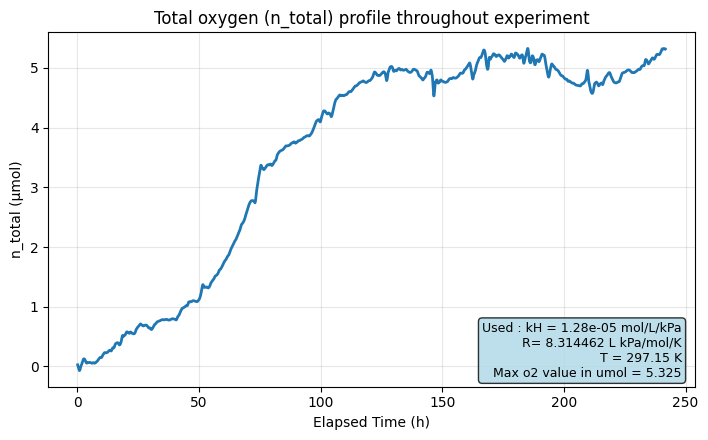

In [ ]:
time_h     = pd.to_numeric(df[time_col])
p_kpa      = pd.to_numeric(df[press_col])
n_gas_umol = pd.to_numeric(df[gas_col])

#constants
KH = 1.283e-5           # mol/L/kPa
Vsol = 0.006           # L
Vg = 0.002  
R = 8.314462           # L kPa/mol/K
T = 297.15             # K



def calculate_n_total (p_kpa: pd.Series, Vg: float, Vsol: float, R: float, T: float, KH: float) -> pd.Series:
    ntot = p_kpa * ( (Vg / (R*T)) + (KH * Vsol)) 
    ntot_umol = ntot * 1e6  # Convert to µmol
    return ntot_umol



ntot_umol = calculate_n_total(p_kpa, Vg, Vsol, R, T, KH)

print(ntot_umol.values.max())
df_out = pd.DataFrame({
    "Elapsed Time (h)": time_h,
    "n_total (µmol)": ntot_umol
})

plt.figure(figsize=(7.2, 4.5))
plt.plot(df_out["Elapsed Time (h)"], df_out["n_total (µmol)"], linewidth=2)
plt.ylabel("n_total (µmol)")
plt.xlabel("Elapsed Time (h)")
plt.title("Total oxygen (n_total) profile throughout experiment")

# Add detailed info box
info_text = f"""Used : kH = {KH:.2e} mol/L/kPa
R= {R} L kPa/mol/K
T = {T} K
Max o2 value in umol = {ntot_umol.values.max():.3f}"""

plt.text(0.98, 0.02, info_text, 
         transform=plt.gca().transAxes,
         verticalalignment='bottom',
         horizontalalignment='right',
         fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))




plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Using the full equation to see if there is a difference in the total umol produced by 1. keeping pressure and other units in Kpa   and 2. Keeping pressure and other units in atm




""" Units used:

KH = 1.283e-5          
R = 8.314462  


for atm,
KH = 1.3e-3                        
R=   0.082057366080960            


Sticking with K instead of C. The ideal gas law and henry's law both scale with kelvin so using celcius scaling will become inappropriate.


Using : Vg / (R * T) + kH * Vsol


"""

In [4]:
t_h   = pd.to_numeric(df[time_col], errors="coerce")
P_kPa = pd.to_numeric(df[press_col], errors="coerce")
mask = t_h.notna() & P_kPa.notna()
t_h, P_kPa = t_h[mask].reset_index(drop=True), P_kPa[mask].reset_index(drop=True)
t_h = t_h - t_h.iloc[0]  # start time at 0 h
P_atm = P_kPa / 101.325


# Geometry & constants
Vg   = 0.002     # L
Vsol = 0.006     # L
T_K  = 297.15    # K

# --- (A) kPa-guided calculation ---
R_kPa  = 8.31446261815324              # L·kPa·mol^-1·K^-1
kH_kPa = 1.3e-3 / 101.325              # mol·L^-1·kPa^-1 (~1.283e-5)
A_kPa  = Vg/(R_kPa*T_K) + kH_kPa*Vsol  # mol/kPa
n_tot_kPa_umol = P_kPa * A_kPa * 1e6   # µmol

# --- (B) atm-guided calculation ---
R_atm  = 0.082057366080960             # L·atm·mol^-1·K^-1
kH_atm = 1.3e-3                        # mol·L^-1·atm^-1
A_atm  = Vg/(R_atm*T_K) + kH_atm*Vsol  # mol/atm
n_tot_atm_umol = P_atm * A_atm * 1e6   # µmol

# Residuals
final_kpa = max(n_tot_kPa_umol)
final_atm = max(n_tot_atm_umol)
diff_umol = final_kpa - final_atm
print(f"max values of o2 in umol produced by keeping pressure in kpa : {final_kpa}")
print(f"max values of o2 in umol produced by keeping pressure in atm : {final_atm}")
print(f"Max |difference|: {np.abs(diff_umol):.6e} µmol")

max values of o2 in umol produced by keeping pressure in kpa : 5.325480890636497
max values of o2 in umol produced by keeping pressure in atm : 5.325480890636478
Max |difference|: 1.865175e-14 µmol


The above results because of Kpa vs atm just looks like rounding noise. There is no major difference in the total umol produced by both

### Vant hoff modelling for KH


Note that this is only applicable for O2 in water for temperatures less than 348K and delta H is in KJ / mol


1. The enthalpy values of different temperatures throughout the experiment cycle is noted down in the csv file :  M2_2.18mM_pressure_o2_release_DeltaH_from_T.csv

2. This is done so by using the fitting equation given in the paper by NIRST.

In [8]:
import pandas as pd
from pathlib import Path
import numpy as np

# ====== user inputs ======
csv_path  = "M2_2.18mM_pressure_o2_release.csv"
temp_col  = "calibrated temperature (C)"   # <-- exact column name in your file
# =========================

# Eq. (11) coefficients for O2 in water (<348 K)
A1, A2 =  83.91236, 23.24323
R = 8.314462618  # J·mol^-1·K^-1

def deltaH_J_per_mol(T_K: pd.Series) -> pd.Series:
    """
    ΔH°(T) = R * (A2*T - 100*A1)  [J/mol]
    (Since A3 = A4 = 0 for this temperature range.)
    """
    return R * (A2 * T_K - 100.0 * A1)

# --- load & clean ---
df = pd.read_csv(csv_path)
df.columns = [c.strip() for c in df.columns]
T_C_orig = pd.to_numeric(df[temp_col], errors="coerce").dropna().reset_index(drop=True)

# --- round °C to 2 decimals, convert to K ---
T_C_round2 = T_C_orig.round(2)
T_K_from_round = T_C_round2 + 273.15

# --- compute ΔH ---
dH_Jmol  = deltaH_J_per_mol(T_K_from_round)
dH_kJmol = dH_Jmol / 1000.0

# --- assemble output table ---
out = pd.DataFrame({
    "T_C_original": T_C_orig,
    "T_C_rounded_2dp": T_C_round2,
    "T_K_from_rounded": T_K_from_round,
    "DeltaH_kJ_per_mol": dH_kJmol
})

# --- save ---
out_path = Path(csv_path).with_name(Path(csv_path).stem + "_DeltaH_from_T.csv")
out.to_csv(out_path, index=False)
print(f"Saved: {out_path}")
print(out.head(8).to_string(index=False))


Saved: M2_2.18mM_pressure_o2_release_DeltaH_from_T.csv
 T_C_original  T_C_rounded_2dp  T_K_from_rounded  DeltaH_kJ_per_mol
        24.31            24.31            297.46         -12.282996
        24.32            24.32            297.47         -12.281063
        24.31            24.31            297.46         -12.282996
        24.30            24.30            297.45         -12.284928
        24.33            24.33            297.48         -12.279130
        24.32            24.32            297.47         -12.281063
        24.31            24.31            297.46         -12.282996
        24.32            24.32            297.47         -12.281063


Now actually finding the different henry's constant values with the different H values.

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path

# ===== inputs =====
# CSV produced in the previous step (with T_K_from_rounded + DeltaH_kJ_per_mol)
dh_csv_path = "M2_2.18mM_pressure_o2_release_DeltaH_from_T.csv"
tempK_col   = "T_K_from_rounded"      # Kelvin (from rounded °C)
dH_col      = "DeltaH_kJ_per_mol"     # kJ/mol
# Reference (always relative to this):
T_REF_K     = 297.15                  # K
kH_ref_atm  = 1.30e-3                 # mol·L^-1·atm^-1 at 297.15 K
R_J         = 8.314462618             # J·mol^-1·K^-1
# ==================

# Load ΔH data
df = pd.read_csv(dh_csv_path)
TK = pd.to_numeric(df[tempK_col], errors="coerce")
dH_kJmol = pd.to_numeric(df[dH_col], errors="coerce")

# van’t Hoff: kH(T) = kH_ref * exp( -(ΔH/R)*(1/T - 1/T_ref) )
dH_Jmol = dH_kJmol * 1000.0
ln_ratio = -dH_Jmol / R_J * (1.0/TK - 1.0/T_REF_K)
kH_T_atm = kH_ref_atm * np.exp(ln_ratio)   # mol·L^-1·atm^-1

# Build output table
out = pd.DataFrame({
    "Temperature_K": TK,
    "DeltaH_kJ_per_mol": dH_kJmol,
    "kH_mol_per_L_atm": kH_T_atm
})

# Save
out_path = Path("henry's constants.csv")
out.to_csv(out_path, index=False)
print(f"Saved: {out_path}")
print(out.head().to_string(index=False))




Saved: henry's constants.csv
 Temperature_K  DeltaH_kJ_per_mol  kH_mol_per_L_atm
        297.46         -12.282996          0.001293
        297.47         -12.281063          0.001293
        297.46         -12.282996          0.001293
        297.45         -12.284928          0.001293
        297.48         -12.279130          0.001293


Now using the generated Henry's constant value for each temperature on the whole equation:

Saved: M2_2.18mM_pressure_o2_release_n_total_dynamic_T_kH.csv


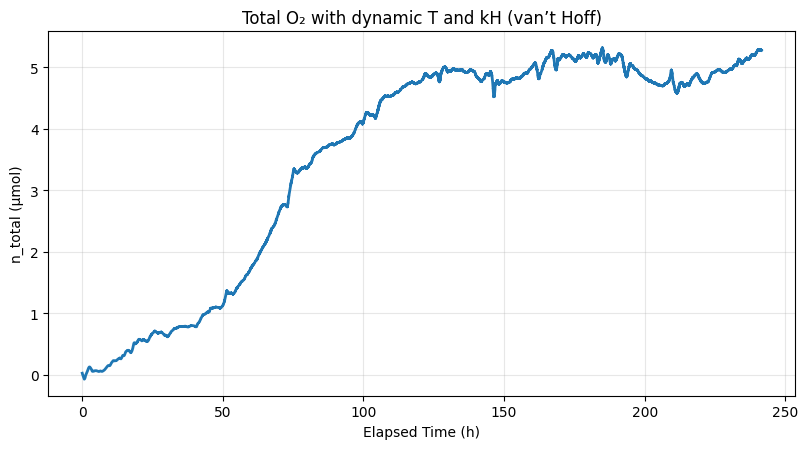

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# ---------------- inputs ----------------
main_csv   = "M2_2.18mM_pressure_o2_release.csv"
time_col   = "Time (s)"                      # your values are actually hours
press_col  = "DWT denoised pressure (kPa)"   # PO2 in kPa (set flag below if gauge)
henry_csv  = "C:\Users\chand\Documents\GitHub\Thesis\henry's constants.csv"

# ----------------------------------------

# Constants (atm-based calc)
R   = 0.082057366079   # L·atm·mol^-1·K^-1
Vg  = 0.002            # L
Vsol= 0.006            # L
KPA_PER_ATM = 101.325

# ---- load main & henry ----
df = pd.read_csv(main_csv)
df.columns = [c.strip() for c in df.columns]
t_h   = pd.to_numeric(df[time_col], errors="coerce")
P_kPa = pd.to_numeric(df[press_col], errors="coerce")
mask  = t_h.notna() & P_kPa.notna()
t_h, P_kPa = t_h[mask].reset_index(drop=True), P_kPa[mask].reset_index(drop=True)
t_h = t_h - t_h.iloc[0]  # start time at 0 h

# Absolute pressure in atm

P_abs_atm = P_kPa / KPA_PER_ATM

# Henry/Temperature (dynamic) from file
hdf = pd.read_csv(henry_csv)
hdf.columns = [c.strip() for c in hdf.columns]
T_K  = pd.to_numeric(hdf["Temperature_K"], errors="coerce")
kH_T = pd.to_numeric(hdf["kH_mol_per_L_atm"], errors="coerce")

# --- align lengths (basic check) ---
n_main = len(P_abs_atm)
n_h    = len(T_K)
if n_main != n_h:
    raise ValueError(f"Row mismatch: main={n_main}, henry={n_h}. "
                     "Ensure both were built from the same rows/filtering so they align 1:1.")

# --- compute n_total(t) in µmol with dynamic T and kH ---
A_gas_term = Vg / (R * T_K.values)          # mol/atm
A_aq_term  = kH_T.values * Vsol             # mol/atm
A_total    = A_gas_term + A_aq_term         # mol/atm

n_tot_umol = (P_abs_atm.values * A_total) * 1e6  # µmol

# --- assemble & save ---
out = pd.DataFrame({
    "Elapsed Time (h)": t_h,
    "P_abs (atm)": P_abs_atm,
    "Temperature_K": T_K,
    "kH_mol_per_L_atm": kH_T,
    "n_tot (µmol)": n_tot_umol
})
out_path = Path(main_csv).with_name(Path(main_csv).stem + "_n_total_dynamic_T_kH.csv")
out.to_csv(out_path, index=False)
print(f"Saved: {out_path}")

# --- quick plot ---
plt.figure(figsize=(8.2, 4.6))
plt.plot(out["Elapsed Time (h)"], out["n_tot (µmol)"], linewidth=2)
plt.xlabel("Elapsed Time (h)")
plt.ylabel("n_total (µmol)")
plt.title("Total O₂ with dynamic T and kH (van’t Hoff)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### KK modelling for KH
